# TMDb Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project i am going to walk you through the data analysis process of the movie data-base(TMDb) dataset.<br>
This data contains several interesting variables of movies (both old and new) like the cast and crew, the budget, revenue, genres etc... which you can learn more about in this <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">link</a>.<br>
After observing the data for a while, some question come to mind:
* Is making movies becoming a more lucrative business with each year ?
* what feature have the most impact on the popularity of the movie ? is it the cast and crew size, the porduction company or the genre of the movie ?
* how does the rating affect the popularity of a movie and it's commercial success
* Which season releases the most movies?
* Which genres has the most revenue/budget ratio ?

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style('darkgrid')
%matplotlib inline

In [71]:
# These fuctions will be used to clean our data later on:

## Get the first three elements of a JSON objects in a Pandas Serie 
def Get_first_elements(serie, field, number): 
    main_elements = []
    for i in serie:
        elements = ""
        all_elements = json.loads(i)[0:number]
        for j in all_elements:
            elements += j[field] + "|" 
        main_elements.append(elements[:-1]) #removing the last "|"
    return main_elements

## Get the size of a JSON objects in a Pandas Serie 
def Get_size(serie):
    sizes = []
    for i in serie:
        sizes.append(len(json.loads(i)))
    return sizes

<a id="wrangling"></a>
## Assessing and Wrangling Data
### Loading Data
The TMDb data is composed of two datasets, where one is dedicated to the movies stats while the othe is dedicated to the casts and crew of said movies

In [72]:
movies = pd.read_csv("tmdb_5000_movies.csv")
movies.head(2) 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [73]:
credits = pd.read_csv("tmdb_5000_credits.csv")
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### General Properties of the Movies Data

In [74]:
# The dimensions of the Data 
print(f"Number of columns: {movies.shape[1]}")
print(f"Number of rows: {movies.shape[0]}")

Number of columns: 20
Number of rows: 4803


In [75]:
# Checking the data types of each feature of the movies data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [76]:
# Features with missing values
movies.columns[movies.isna().any()]

Index(['homepage', 'overview', 'release_date', 'runtime', 'tagline'], dtype='object')

In [77]:
# Number of duplicate rows
movies.duplicated().sum()

0

We can see when displaying the first five rows of our movies data that the "genres", "keywords", "production_companies", "production_countries", "spoken_languages" columns have the same format as a JSON object, this can help us greatly later when we want to work with these columns like the examples in the cell bellow:

In [78]:
# Displaying all the genres of the first movie:
json.loads(movies.genres[0])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [79]:
# Displaying one of the genres of the first movie:
json.loads(movies.genres[0])[0]["name"]

'Action'

### General Properties of the Credits Data

In [80]:
# The dimensions of the Data 
print(f"Number of columns: {credits.shape[1]}")
print(f"Number of rows: {credits.shape[0]}")

Number of columns: 4
Number of rows: 4803


In [81]:
# Checking the data types of each feature of the credits data
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [82]:
# Features with missing values
credits.columns[credits.isna().any()]

Index([], dtype='object')

In [83]:
# Number of duplicate rows
credits.duplicated().sum()

0

Like in the movies data, the "cast" and "crew" columns are also in the form of a JSON objects array.

In [84]:
# Displaying the first 3 actors of the first movie:
json.loads(credits.cast[0])[0:3]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2}]

In [85]:
# Displaying the first 3 crew members of the first movie:
json.loads(credits.crew[0])[0:3]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'}]

### Dropping extraneous columns 
When it comes to the data types of each feature, it appears that there is no need for correction as they are already adequate.<br>
What we can do though, is get rid of some of the columns in the movies dataset like the "homepage", "keywords", "overview", "original_title", "title" and "tagline" columns as they are specific to the movie they belong to and won't help us in answering our questions anyway.

In [86]:
movies.drop(["homepage", "keywords", "overview", "original_title", "title", "tagline", "spoken_languages"], 
            inplace = True, axis = 1)
movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500


We saw from the general properties of the two dataframes, there is a possibility to fuse the two datasets together as they have the same number of entries which means that most likely, it is possible to join them together.

In [87]:
credits.drop(["title"], inplace = True, axis = 1)
pd.DataFrame(credits.iloc[0])

,0
movie_id,19995
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Merging the two datasets
Merging the two datasets will help us tremendously as it will make it easier to call features and especially easier if we want to make any further changes on the data in general 

In [88]:
credits.rename(columns = {"movie_id":"id"}, inplace = True)
credits.head()

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [89]:
# Source : https://pandas.pydata.org/pandas-docs/dev/user_guide/merging.html
data = pd.merge(movies, credits, on = "id")
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [90]:
data.shape

(4803, 15)

### Exploring the "status" column
All that we need to do now is to remove any duplicate rows or any rows that contain null values, but before that, there is one columns in particular that got my interest, which is the status feature, let's see what it is about:

In [91]:
# Getting the values of the status columns
data.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [92]:
# Getting the value counts of the status columns
pd.DataFrame(data.status.value_counts()).transpose()

,Released,Rumored,Post Production
status,4795,5,3


Seems like only 8 movies from this data set didn't get released, in this case, we can keep the released movies and get rid of the rest, then drop the status column

In [93]:
data = data.query("status == 'Released'")
data.drop(columns="status", axis = 1, inplace = True)
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [94]:
data.shape

(4795, 14)

### Getting the first two genres of each movie 
This will help us better categorize each movie

In [95]:
# Get 2 of the genres of each movie
data.genres = Get_first_elements(data.genres, "name", 2)
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew
0,237000000,Action|Adventure,19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,Adventure|Fantasy,285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


After this, we are going to remove the pipe caracter("|"), we will be doing this by splitting them and having each movie contain one of its genres in a seperate row

In [96]:
temp_data = data[data.genres.str.contains("|")]

In [97]:
df1 = temp_data.copy()  # data on first genre of each movie
df2 = temp_data.copy()  # data on second genre of each movie

In [98]:
# Splitting genres (1 genre for each row)
df1["genres"] = df1["genres"].apply(lambda x: x.split("|")[0]) 
df2["genres"] = df2["genres"].apply(lambda x: x.split("|")[-1]) 

In [99]:
# combine dataframes to add to the original dataframe
new_rows = pd.concat([df1, df2])

In [100]:
# Removing the original rows
data = new_rows
data.shape

(9590, 14)

### Getting the production company 
This will help us determine how can the production company leave an impact on the other variables

In [101]:
data.production_companies = Get_first_elements(data.production_companies, "name", 1)

### Getting the number of production countries of each movie
the reasoning behind this is the same with production companies

In [102]:
data.production_countries = Get_size(data.production_countries)

### Replacing the "cast" column elements with the cast size
Later in this project we want to see how can the cast size affect other variables like the budget, revenue etc...

In [103]:
data.cast = Get_size(data.cast)

### Replacing the "crew" column elements with the crew size
Later in this project we want to see how can the crew size affect other variables like the budget, revenue etc...

In [104]:
data.crew = Get_size(data.crew)

### Converting the "release_date" type to datetime
This will make it easier later on when navigating through dates and categorizing by time

In [105]:
data.release_date = data.release_date.astype("datetime64")

In [106]:
# General info on data columns, dtypes, and counts
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9590 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                9590 non-null   int64         
 1   genres                9590 non-null   object        
 2   id                    9590 non-null   int64         
 3   original_language     9590 non-null   object        
 4   popularity            9590 non-null   float64       
 5   production_companies  9590 non-null   object        
 6   production_countries  9590 non-null   int64         
 7   release_date          9588 non-null   datetime64[ns]
 8   revenue               9590 non-null   int64         
 9   runtime               9586 non-null   float64       
 10  vote_average          9590 non-null   float64       
 11  vote_count            9590 non-null   int64         
 12  cast                  9590 non-null   int64         
 13  crew              

In [107]:
# Dropping NaN values
data = data.dropna()

In [108]:
# Checking for duplicate rows
data.duplicated().sum()

922

Earlier when we checked both datasets for duplicate columns, we didn't get any, but now we have 922, the reason for this is that some of the movies have only one genre listed (and we wanted to select 2).

In [109]:
# Dropping duplicate columns 
data = data.drop_duplicates()
data.duplicated().sum()

0

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8662 entries, 0 to 4800
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                8662 non-null   int64         
 1   genres                8662 non-null   object        
 2   id                    8662 non-null   int64         
 3   original_language     8662 non-null   object        
 4   popularity            8662 non-null   float64       
 5   production_companies  8662 non-null   object        
 6   production_countries  8662 non-null   int64         
 7   release_date          8662 non-null   datetime64[ns]
 8   revenue               8662 non-null   int64         
 9   runtime               8662 non-null   float64       
 10  vote_average          8662 non-null   float64       
 11  vote_count            8662 non-null   int64         
 12  cast                  8662 non-null   int64         
 13  crew              

<a id="eda"></a>
## Exploratory Data Analysis

In [111]:
data.dtypes

budget                           int64
genres                          object
id                               int64
original_language               object
popularity                     float64
production_companies            object
production_countries             int64
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
vote_average                   float64
vote_count                       int64
cast                             int64
crew                             int64
dtype: object

### Is making movies becoming a more lucrative business with each year ?
In this sectiont we will learn more about the evolution of how money is spent ang how lucrative the cinema business is, also we will take a look on how the movies revenue is compared to the budget.<br>

In [112]:
data.release_date.describe()

/tmp/ipykernel_559805/3433328330.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.release_date.describe()


count                    8662
unique                   3277
top       2006-01-01 00:00:00
freq                       15
first     1916-09-04 00:00:00
last      2017-02-03 00:00:00
Name: release_date, dtype: object

As we can see, the earliest release year in our data is 1916 while latest is 2017, what we can do is split our data per era and see what we can find

In [113]:
levels = ["10s", "20s", "30s", 
          "40s", "50s", "60s", 
          "70s", "80s", "90s", 
          "2000s", "2010s"]
edges = [1910, 1920, 1930,
         1940, 1950, 1960, 
         1970, 1980, 1990, 
         2000, 2010, 2020]

data["era"] = pd.cut(data.release_date.dt.year, edges, labels = levels)
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,era
0,237000000,Action,19995,en,150.437577,Ingenious Film Partners,2,2009-12-10,2787965087,162.0,7.2,11800,83,153,2000s
1,300000000,Adventure,285,en,139.082615,Walt Disney Pictures,1,2007-05-19,961000000,169.0,6.9,4500,34,32,2000s


Text(0, 0.5, 'ratio')

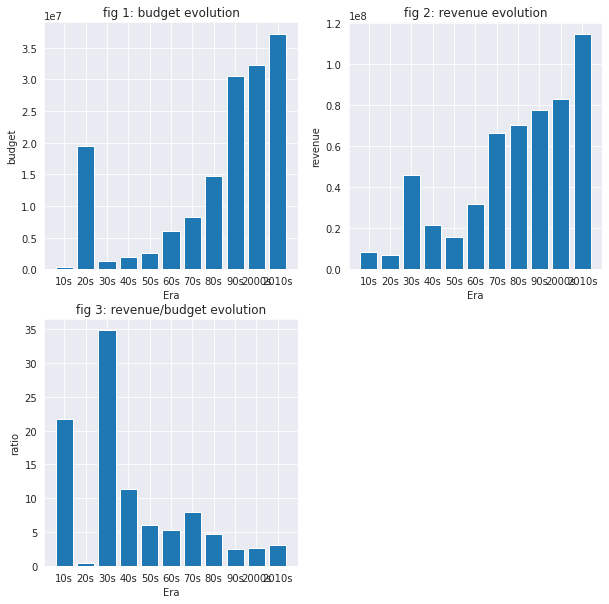

In [114]:
plt.figure(figsize=(10, 10))
locations = [i for i in range(len(levels))]
labels = list(data.groupby("era")["budget"].mean().index)

plt.subplot(221)
budget_heights = data.groupby("era")["budget"].mean().values
plt.bar(locations, budget_heights, tick_label=labels)
plt.title("fig 1: budget evolution")
plt.xlabel("Era")
plt.ylabel("budget")

plt.subplot(222)
rev_heights = data.groupby("era")["revenue"].mean().values
plt.bar(locations, rev_heights, tick_label=labels)
plt.title("fig 2: revenue evolution")
plt.xlabel("Era")
plt.ylabel("revenue")

plt.subplot(223)
ratio_heights = rev_heights/budget_heights # Revenue to budget ratio
# If the ratio is less than 1 that means that the money spent is less than the revenue
# If the ratio is greater than 1 that means the movie is a commercial success
plt.bar(locations, ratio_heights, tick_label=labels)
plt.title("fig 3: revenue/budget evolution")
plt.xlabel("Era")
plt.ylabel("ratio")

We can see from figure 1 and figure 2 that the movies' budget and revenue have increased along the years, this reason for that might be that movies became more accessible worldwide which increased it's visibility thus making producers invest more.<br>
From figure 3, we can see that the revenue/budget ration is decreasing, i think it is pretty normal since production values increased dramatically from what it used to be but it is still lucrative with an average ratio of ~3 in the 2010s

### what feature have the most impact on the popularity of the movie ? is it the cast and crew size, the production company or the genre of the movie ?

#### Cast and crew size impact on popularity

Text(0, 0.5, 'popularity')

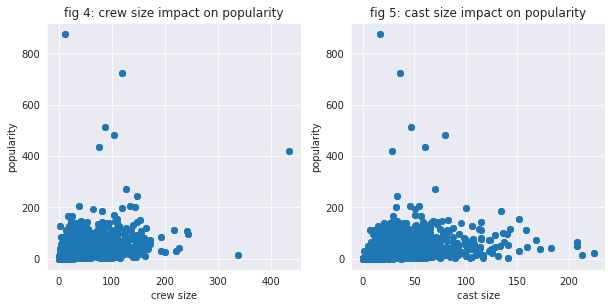

In [115]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(data.crew, data.popularity)
plt.title("fig 4: crew size impact on popularity")
plt.xlabel("crew size")
plt.ylabel("popularity")

plt.subplot(222)
plt.scatter(data.cast, data.popularity)
plt.title("fig 5: cast size impact on popularity")
plt.xlabel("cast size")
plt.ylabel("popularity")

From the two plots above, there seems to be some outliers in the popularity column, what we can do for know, is ignore any entries that have a popularity of more than 300

Text(0, 0.5, 'popularity')

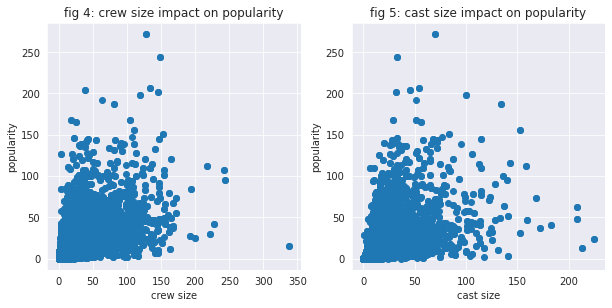

In [116]:
# creating a temporary data with no outliers
temp_data = data.query("popularity < 300")

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(temp_data.crew, temp_data.popularity)
plt.title("fig 4: crew size impact on popularity")
plt.xlabel("crew size")
plt.ylabel("popularity")

plt.subplot(222)
plt.scatter(temp_data.cast, temp_data.popularity)
plt.title("fig 5: cast size impact on popularity")
plt.xlabel("cast size")
plt.ylabel("popularity")

What we can conclude from this, is that for most movies with small crews and casts, does not have higher popularity (appart from some movies), other than that, we can't say anything conclussive

#### Production companies' impact on popularity

In [117]:
print("number of production companies present in our data")
len(data.production_companies.unique())

number of production companies present in our data


1311

Since we have more than 1000 production companies, it doesn't make sense to study them all as it will make reading graphs and identifying them nearly impossible, what we can do is select only the ones with the most movie counts

In [118]:
print("Top 20 production companies in terms of movie counts")
prod_comp_data = data.production_companies.value_counts()[:20]
prod_comp_data

Top 20 production companies in terms of movie counts


                                          537
Paramount Pictures                        511
Universal Pictures                        480
Columbia Pictures                         370
Twentieth Century Fox Film Corporation    328
New Line Cinema                           278
Walt Disney Pictures                      218
Miramax Films                             161
Village Roadshow Pictures                 132
United Artists                            125
Columbia Pictures Corporation             121
Warner Bros.                              121
DreamWorks SKG                            119
Fox Searchlight Pictures                  114
Metro-Goldwyn-Mayer (MGM)                  85
Summit Entertainment                       80
TriStar Pictures                           70
Touchstone Pictures                        70
Regency Enterprises                        64
The Weinstein Company                      59
Name: production_companies, dtype: int64

Text(0, 0.5, 'Production companies')

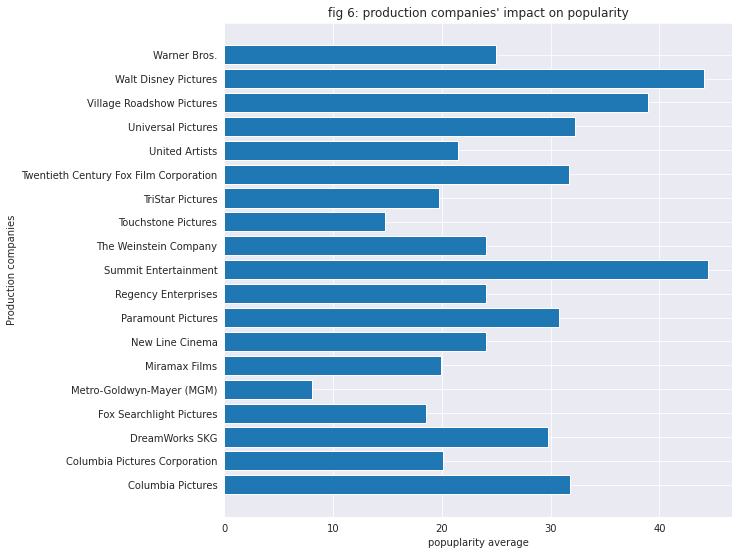

In [153]:
locations = [i for i in range(len(prod_comp_data))]
labels = prod_comp_data.index

plt.figure(figsize=(20, 20))

plt.subplot(221)
heights = data[data["production_companies"].apply(lambda x : x in prod_comp_data.index)]
heights = heights.groupby("production_companies")["popularity"].mean()[1:]

plt.barh(heights.index,heights.values)
plt.title("fig 6: production companies' impact on popularity")
plt.xlabel("popuplarity average")
plt.ylabel("Production companies")

What we can get from this is that the production campany might not actually have an impact on the popularity of the movie as seen in figure 6, this is more apparent when we take for example Disney, one of the most popular if not the most popular production company, yet out of the 20 companies,it has a low average compared to others

#### Which movie genre is more popular

In [120]:
genres = list(data.genres.unique())
genres

['Action',
 'Adventure',
 'Fantasy',
 'Animation',
 'Science Fiction',
 'Drama',
 'Thriller',
 'Family',
 'Comedy',
 'History',
 'War',
 'Western',
 'Romance',
 'Crime',
 'Mystery',
 'Horror',
 'Documentary',
 'Music',
 'TV Movie',
 '',
 'Foreign']

Text(0, 0.5, 'genres')

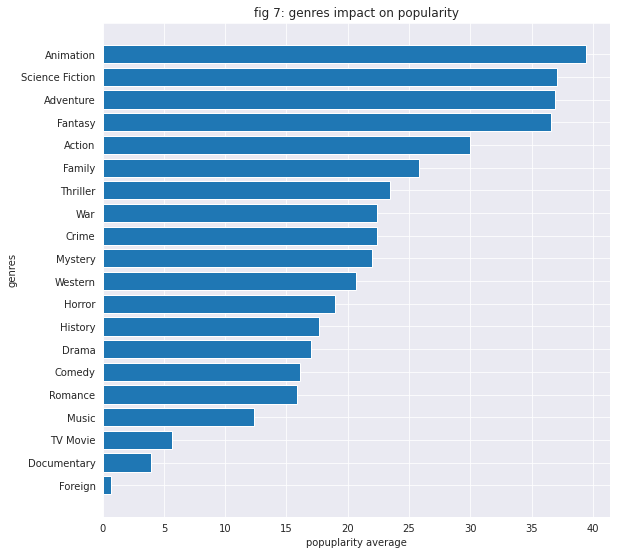

In [160]:
locations = [i for i in range(len(genres))]

plt.figure(figsize=(20, 20))

plt.subplot(221)
heights = data.groupby("genres")["popularity"].mean()[1:].sort_values()

plt.barh(heights.index,heights.values)
plt.title("fig 7: genres impact on popularity")
plt.xlabel("popuplarity average")
plt.ylabel("genres")

We can see from figure 7 that:
* for the top 5 most popular genres that they are what we could call "crowd pleasers", they are genres that appeal the most to the masses, they are compatibles with almost all ages, have high production values, which could explain their popularity.
* for the 5 least popular genres, we could say the opposite of what we said before, for example, in the case of foreign movies, the audience of that genre is limited to the ones who can understang the language spoken in that movie, unlike english which is spoken globally.

### how does the rating affect the popularity of a movie and it's commercial success

To find if a movies is a commercial success or not, we can add a new column to our dataframe which contains the revenus/budget ratio for each movie.<br>
If the ratio is greater than 1 (revenue > budget), that means that the movie is a commercial success.

In [122]:
data["ratio"] = (data.revenue+1) / (data.budget+1)
# I added +1 to avoid cases where there is a division by 0
# Most of the values 10⁷ or higher so adding one should be negligeable
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,era,ratio
0,237000000,Action,19995,en,150.437577,Ingenious Film Partners,2,2009-12-10,2787965087,162.0,7.2,11800,83,153,2000s,11.763566
1,300000000,Adventure,285,en,139.082615,Walt Disney Pictures,1,2007-05-19,961000000,169.0,6.9,4500,34,32,2000s,3.203333


Text(0, 0.5, 'ratio')

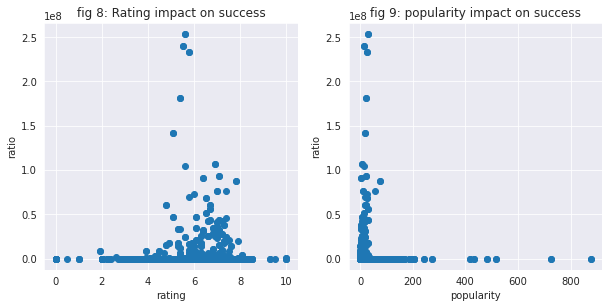

In [133]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(data.vote_average, data.ratio)
plt.title("fig 8: Rating impact on success")
plt.xlabel("rating")
plt.ylabel("ratio")

plt.subplot(222)
plt.scatter(data.popularity, data.ratio)
plt.title("fig 9: popularity impact on success")
plt.xlabel("popularity")
plt.ylabel("ratio")

Again, it appears that we have some outliers in the ratio columns with values of more than 1000 for example which is highly unlikely in reality, this can be avoided by ignoring any ratio that is bigger than 100 for example 

Text(0, 0.5, 'ratio')

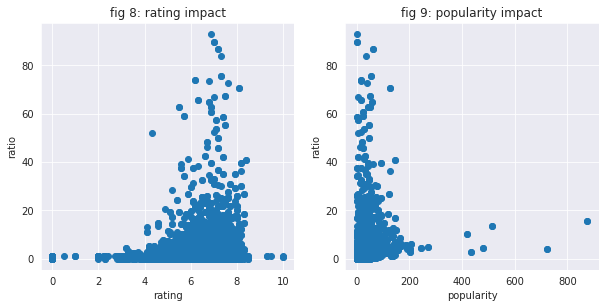

In [124]:
# creating a temporary data with no outliers
temp_data = data.query("ratio < 100")

plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(temp_data.vote_average, temp_data.ratio)
plt.title("fig 8: rating impact")
plt.xlabel("rating")
plt.ylabel("ratio")

plt.subplot(222)
plt.scatter(temp_data.popularity, temp_data.ratio)
plt.title("fig 9: popularity impact")
plt.xlabel("popularity")
plt.ylabel("ratio")

For figure 8: we can see that the rating doesn't really impact the success of the movie if the rating is greater than 7 (or at least we cannot conclude that), but for ratings of less than 7, we can see a positive relation.
For Figure 9: We see that the popularity of the movie is not a good indicator of it's success

### Which season releases the most movies ?

To know which season produces the most movies, we can split the data to four categories(quarters), each categorie representing the quarter in which the movie was released in

In [125]:
levels = ["Q1", "Q2", "Q3", "Q4"]
edges = [0, 3, 6, 9, 12]

data["quarter"] = pd.cut(data.release_date.dt.month, edges, labels = levels)
data.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,vote_average,vote_count,cast,crew,era,ratio,quarter
0,237000000,Action,19995,en,150.437577,Ingenious Film Partners,2,2009-12-10,2787965087,162.0,7.2,11800,83,153,2000s,11.763566,Q4
1,300000000,Adventure,285,en,139.082615,Walt Disney Pictures,1,2007-05-19,961000000,169.0,6.9,4500,34,32,2000s,3.203333,Q2


Text(0, 0.5, 'amount')

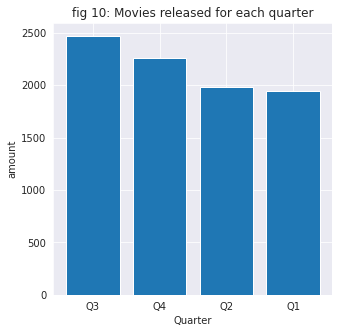

In [126]:
plt.figure(figsize=(5, 5))
locations = [i for i in range(len(levels))]
labels = data.quarter.value_counts().index

heights = data.quarter.value_counts()
plt.bar(locations, heights, tick_label=labels)
plt.title("fig 10: Movies released for each quarter")
plt.xlabel("Quarter")
plt.ylabel("amount")

The answer to the question of this section is clear and simple, the second half of the year is the one where most of the movies are released(i.e: summer and autumn), this can be linked to many things but unfortunately, we can't find the cause of this in our data, what we can do is make a theory, my theory is that more movies are released in that period (Q3 and Q4) because of summer breaks and holiday seasons, this theory is not backed by anything, so take it with a grain of salt. 

### Which genres has the most revenue/budget ratio ?

Text(0, 0.5, 'genres')

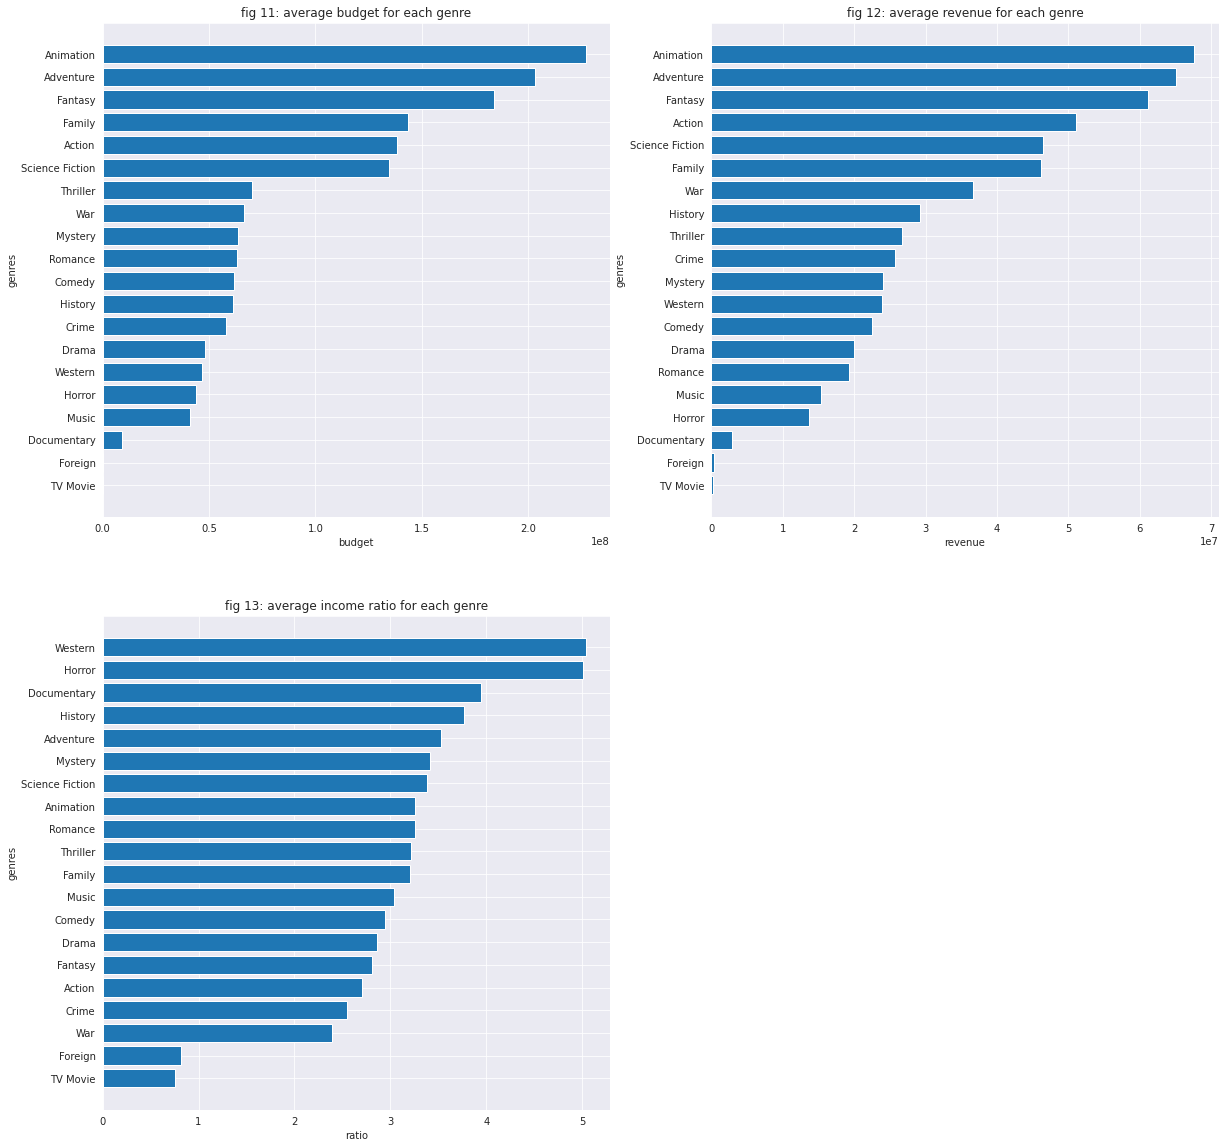

In [158]:
locations = [i for i in range(len(genres))]

plt.figure(figsize=(20, 20))
temp_data = data.query("ratio < 100") #Removing ratio outliers

plt.subplot(221)
heights = temp_data.groupby("genres")["revenue"].mean()[1:].sort_values()
plt.barh(heights.index,heights.values)
plt.title("fig 11: average budget for each genre")
plt.xlabel("budget")
plt.ylabel("genres")

plt.subplot(222)
heights = temp_data.groupby("genres")["budget"].mean()[1:].sort_values()
plt.barh(heights.index,heights.values)
plt.title("fig 12: average revenue for each genre")
plt.xlabel("revenue")
plt.ylabel("genres")

plt.subplot(223)
heights = temp_data.groupby("genres")["ratio"].mean()[1:].sort_values()
plt.barh(heights.index,heights.values)
plt.title("fig 13: average income ratio for each genre")
plt.xlabel("ratio")
plt.ylabel("genres")

To make it easy to explain, let's make an observation for each figure:
* figure 11: we can see from this figure that the genres with the lowest budgets are TV movies, foreign movies and documentaries, it is normal for foreign movies as they are(in general) smaller in scale when compared to thei hollywood counter-parts, as for documentaries and TV movies, their small budget could be expalined because of the smaller crew and cast needed to make them, the opposite can be said the the top 3 highest average budgets(animation, adventure, fantasy) as they require a lot of preparation and/or staff (most of the movies of these genres require a lot of special effects and might be shot in multiple countries)
* figure 12: we can see from the top 5 genres with the highest revenue that they are genres that appeal to most of the people(who doesn't like to watch some action and/or adventure, the same could be said to family movies which are suitable for all ages -> wider audience).
* figure 13: suprisingly, the genres with the top budgets and revenue aren't the ones cith the most revenue/budget ratio, this could be explained by the saturation of the movie market when speaking of those genres(multiple choices -> less people watching), but they are still considerably lucrative.

<a id='conclusions'></a>
## Conclusions
In this dataset, I focused Mainly on n variables :
* budget
* revenue
* release date
* cast and crew
* genres
* popularity and rating<br>
We've discovered in this project that some of them have some type realtion exist between them (for example release time and the amount of movies produced or the genres and the popularity) while other had a somewhat weak relation.<br> 
Although we have some interesting results, there is still a lot to discover in this data.
### Limitations
* After working on many variables in this data, there are more variables that i didn't work with that could also yield some interesting results.
* Some of the data entries have questionable values like budgets or revenues equaling zero, this can hinder the results.
* In the <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata" >website of this dataset</a>, in the open questions area, there is a mention that states that some of the values of the budget and revenue variables might not all be in USD, i dismissed that question because all the values are in the same magnitude, but it is still plausible.